# Ex1:
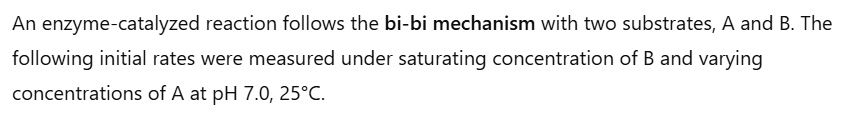
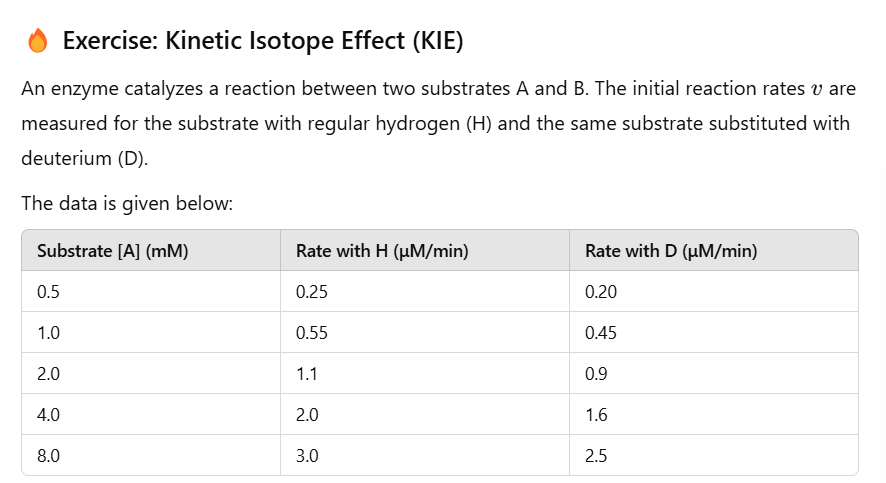
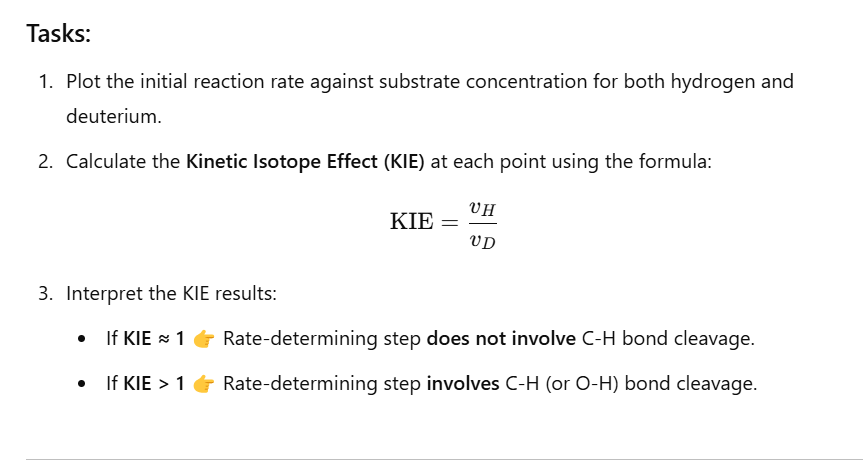
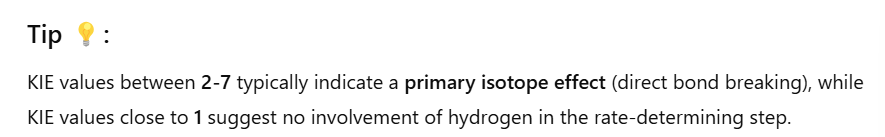

In [1]:
import numpy as np

# Substrate A concentrations (mM)
A = np.array([0.5, 1.0, 2.0, 4.0, 8.0])

# Initial rates with hydrogen (μM/min)
v_H = np.array([0.25, 0.55, 1.1, 2.0, 3.0])

# Initial rates with deuterium (μM/min)
v_D = np.array([0.20, 0.45, 0.9, 1.6, 2.5])


In [16]:
KIE = v_H/v_D

import matplotlib.pyplot as plt
# plt.plot(v_H,KIE)
print(KIE>1)
print(KIE)

[ True  True  True  True  True]
[1.25       1.22222222 1.22222222 1.25       1.2       ]


Because KIE all >1 => rate-determining step involves C-H or O-H cleavage

# Ex2: 
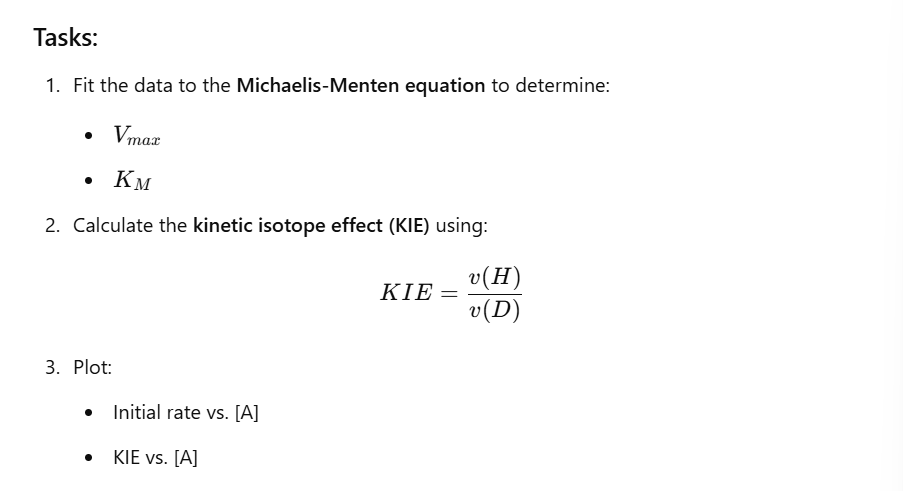

In [15]:
def func_v(S, Vmax, Km):
    return (Vmax*S)/(Km+S)
from scipy.optimize import curve_fit
popt_H, pcov = curve_fit(func_v, A, v_H,p0=(1,1))
popt_D, pcov = curve_fit(func_v, A, v_D,p0=(1,1))
Vmax_H, Km_H=popt_H
Vmax_D, Km_D=popt_D
print(f'Vmax(H) = {Vmax_H:.3f} (M/s), Km(H) = {Km_H:.3f}\nVmax(D) = {Vmax_D:.3f} (M/s), Km(D) = {Km_D:.3f}')

Vmax(H) = 7.090 (M/s), Km(H) = 10.742
Vmax(D) = 6.336 (M/s), Km(D) = 12.177


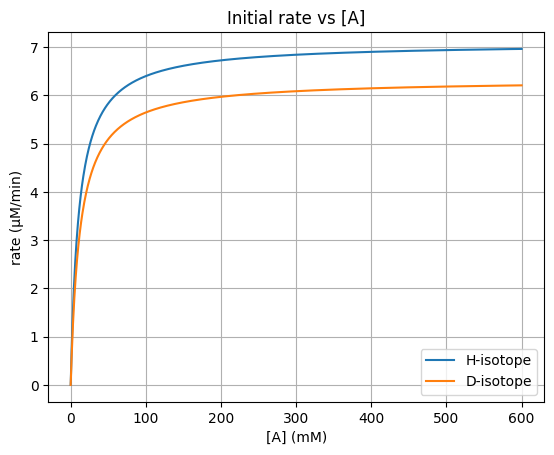

In [30]:
A1=np.linspace(0.001,600,1000)
v_H1=func_v(A1, Vmax_H, Km_H)
v_D1=func_v(A1, Vmax_D, Km_D)
plt.plot(A1,v_H1, label='H-isotope')
plt.plot(A1, v_D1,label='D-isotope')
plt.title('Initial rate vs [A]')
plt.grid(True)
plt.ylabel('rate (μM/min)')
plt.xlabel('[A] (mM)')
plt.legend();

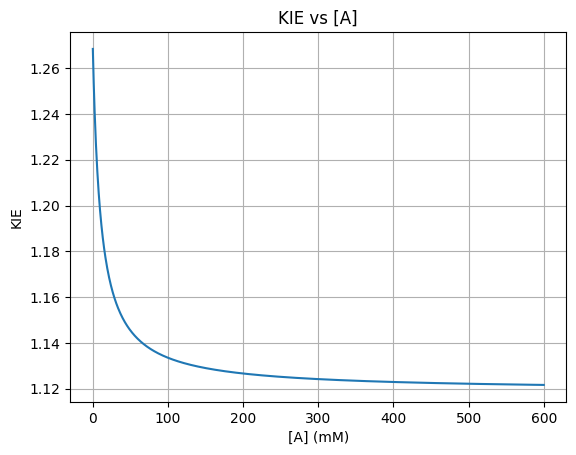

In [33]:
KIE1=v_H1/v_D1
plt.plot(A1, KIE1)
plt.title('KIE vs [A]')
plt.xlabel('[A] (mM)')
plt.ylabel('KIE')
plt.grid(True);

Key observation:
- When [A] large enough, the isotope effect will decrease significantly => the bond is strengthened
- When [A] small (<200 mM), the isotope effect is very high => the bond will highly be broken
- The isotope effect affects the Vmax in Michaelis Menten equation: The rate of D-isotope is smaller than H-isotope about 14%


  => We can apply Isotope effect on stereoselection based on the modification of [A]